# Analysis of the 2nd 2024 Barometer of Catalonia (pt2)
# Exploratory Data Analysis

In this Jupyter Notebook I will perform some basic exploratory data analysis in order to gain initial insights into the dataset, focusing on demographic variables, political attitudes, and language use.

_________________________________________________

The libraries used for the analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

## 00. Importing the data and creating functions for visualize the data

Let's import the preprocessed dataset from the previous program.

In [2]:
df1 = pd.read_excel('cleaned_df.xlsx')
df1.head()

,PROVINCIA,MUNICIPI,COMARCA,CIUTADANIA,SEXE,EDAT,LLOC_NAIX,PROBLEMA_REDUIDA,PARTIT_RESPOSTA_ECONOMIA,PARTIT_RESPOSTA_DESIGUALTATS,...,SIT_LAB,ESTUDIS_1_15,ESTAT_CIVIL_2,LLENGUA_PRIMERA_1_3,LLENGUA_IDENT_1_3,SENTIMENT_PERTINENCA,CLASSE_SOCIAL_SUBJECTIVA_1_7,PERSONES_LLAR,ORIENTACIO_SEXUAL,INGRESSOS_1_15
0,Barcelona,Barcelona (ciutat),Barcelonès,"Sí, tinc la ciutadania (espanyola)",Femení,19,Catalunya,Millorar polítiques socials,No ho sap,No ho sap,...,No treballa,"Educació secundaria (ESO, EGB, Graduat Escolar...",Solter/a,Altres opcions,Català,Més català/ana que espanyol/a,Classe treballadora mitjana,3.0,Heterosexual (parella d’un home i una dona),De 3.001 a 4.000 €
1,Barcelona,Barcelona (ciutat),Barcelonès,"Sí, tinc la ciutadania (espanyola)",Masculí,59,Catalunya,Sanitat,PSC/PSOE,Comuns Sumar,...,Treballa,Arquitectura/Enginyeria Tècnica (Aparellador/a...,Casat/ada,Castellà,Català,Tan espanyol/a com català/ana,Classe mitjana baixa,2.0,Heterosexual (parella d’un home i una dona),De 2.401 a 3.000 €
2,Barcelona,Barcelona (ciutat),Barcelonès,"Sí, tinc la ciutadania (espanyola)",Masculí,68,Catalunya,Insatisfacció amb la política,Cap,Cap,...,No treballa,"Diplomatura (Només diplomatures oficials, no c...",Casat/ada,Català,Català,Tan espanyol/a com català/ana,Classe treballadora mitjana,2.0,Heterosexual (parella d’un home i una dona),De 2.401 a 3.000 €
3,Barcelona,Barcelona (ciutat),Barcelonès,"Sí, tinc la ciutadania (espanyola)",Femení,51,Altres comunitats autònomes,Accés a l'habitatge,Podemos,Podemos,...,Treballa,FP de Grau Superior (Cicle/mòdul formatiu de F...,Solter/a,Castellà,Castellà,No contesta,Classe treballadora alta,1.0,Heterosexual (parella d’un home i una dona),De 2.001 a 2.400 €
4,Barcelona,Barcelona (ciutat),Barcelonès,"Sí, tinc la ciutadania (espanyola)",Femení,70,Catalunya,Relacions Catalunya-Espanya,PSC/PSOE,PSC/PSOE,...,No treballa,Llicenciatura (Titulacions amb equivalència of...,Casat/ada,Català,Català,Més català/ana que espanyol/a,Classe mitjana,2.0,Heterosexual (parella d’un home i una dona),No contesta


In [3]:
df1.columns

Index(['PROVINCIA', 'MUNICIPI', 'COMARCA', 'CIUTADANIA', 'SEXE', 'EDAT',
       'LLOC_NAIX', 'PROBLEMA_REDUIDA', 'PARTIT_RESPOSTA_ECONOMIA',
       'PARTIT_RESPOSTA_DESIGUALTATS', 'PARTIT_RESPOSTA_CAT_ESP',
       'PARTIT_RESPOSTA_SEGURETAT', 'SIT_ECO_CAT', 'SIT_ECO_CAT_RETROSPECTIVA',
       'SIT_ECO_CAT_PROSPECTIVA', 'SIT_ECO_ESP', 'SIT_ECO_ESP_PROSPECTIVA',
       'SIT_ECO_PERSONAL', 'SIT_ECO_PERSONAL_PROSPECTIVA',
       'SIT_CAT_CERCA_FEINA', 'SIT_CAT_CERCA_FEINA_PROSPECTIVA', 'SIT_POL_CAT',
       'SIT_POL_ESP', 'VAL_GOV_CAT', 'VAL_GOV_ESP', 'INF_POL_DIARI_FREQ',
       'INF_POL_TV_FREQ', 'INF_POL_RADIO_FREQ', 'INF_POL_XARXES_FREQ',
       'INF_POL_PREMSA_DIARI', 'INF_POL_XARXES', 'INF_POL_RADIO_EMISSORA',
       'INF_POL_TV_CANAL', 'IDEOL_0_10', 'IDEOL_0_10_PP', 'IDEOL_0_10_ERC',
       'IDEOL_0_10_PSC', 'IDEOL_0_10_CUP', 'IDEOL_0_10_JXCAT',
       'IDEOL_0_10_CEC', 'IDEOL_0_10_VOX', 'IDEOL_0_10_ALIANCA',
       'ESP_CAT_0_10', 'ESP_CAT_0_10_PP', 'ESP_CAT_0_10_ERC',
       'ESP_

Let's create some functions for visualize the data depending on the datatype of the variable 

- **Categorical variable**: I create a barplot in which we see the $n$ counts of the categories of the variable.

In [4]:
def plotCategorica(variable,opcio_xlabel=0):
    plt.figure(figsize=(9, 3))
    # Barplot
    ax = df1[variable].value_counts().plot(kind="bar", color='lightgreen')
    # n counts
    ax.bar_label(ax.containers[0])
    # With this the xlabel categories are in a horitzontal way
    if opcio_xlabel==0:
        plt.xticks(rotation=opcio_xlabel)
    plt.ylabel("N")
    plt.title("Barplot of "+variable)
    plt.show()

- **Numerical variable**: I create a histogram, I show  the mean and median of the variable I describe on the title.

In [5]:
def plotNumerica(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(x=df1[variable],bins=10,color="lightgreen")
    plt.title( "Histogram of "+variable+" || Mean: "+str(round(df1[variable].mean(),2))+
              " || Median: "+str(df1[variable].median()) )
    plt.ylabel("N")
    plt.show()

____________________

# 01. Plotting basic demographic information about the dataset

Regarding the demographic information of the individuals in the sample, we can see that the majority were born in Catalonia, with the vast majority of respondents coming from the province of Barcelona. There is an equal representation of men and women, the age is mostly concentrated between 40 and 70 years old, and almost half are not working, possibly because they are retired.

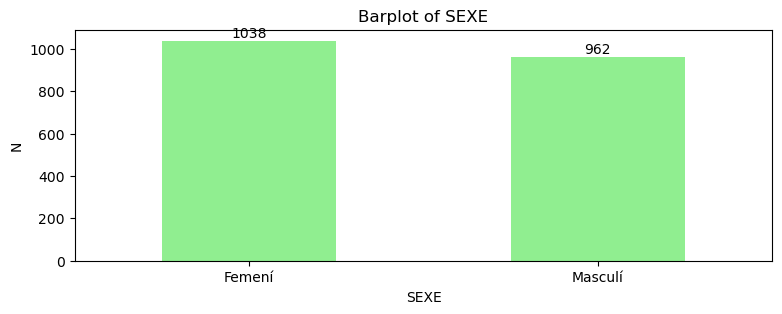

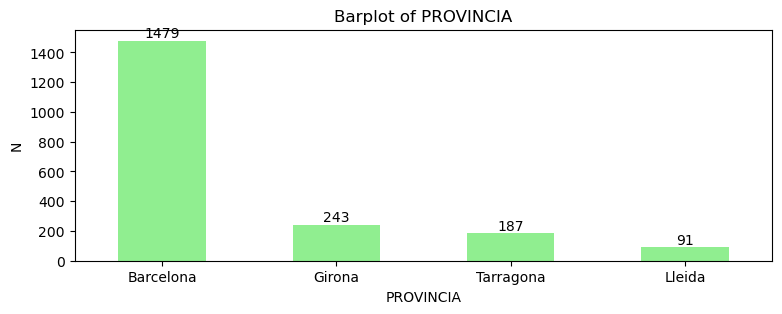

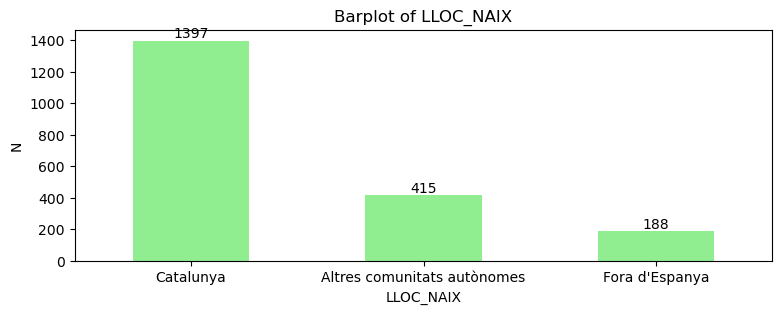

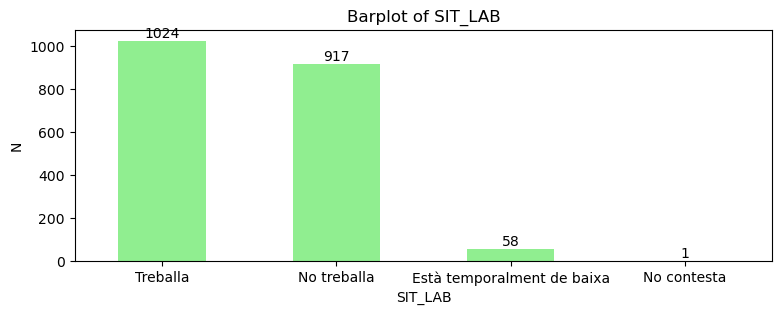

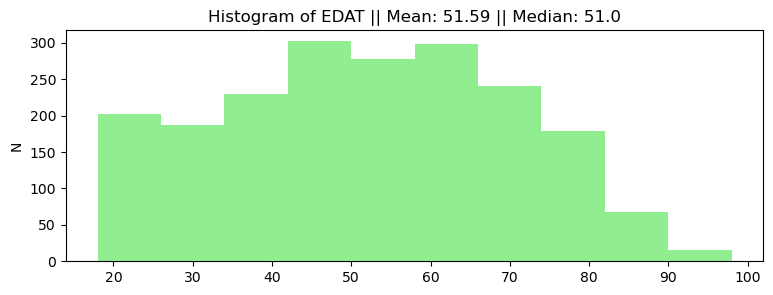

In [6]:
plotCategorica("SEXE")
plotCategorica("PROVINCIA")
plotCategorica("LLOC_NAIX")
plotCategorica("SIT_LAB")
plotNumerica("EDAT")

I am surprised by the big amount of individuals who don't work (```No Treballa```), as I guessed are unemployed people but also retired old people. This boxplots show the age distribution by his Work Status.

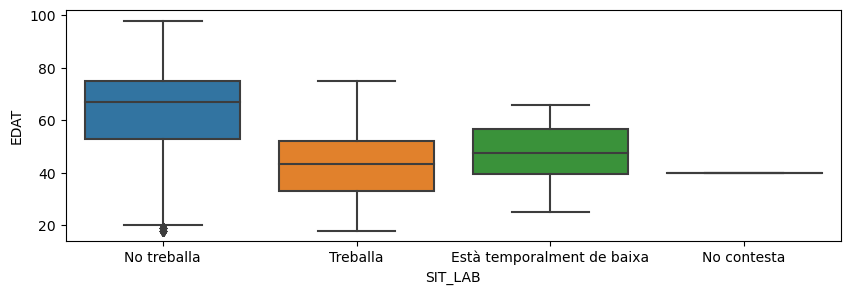

In [7]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=df1["SIT_LAB"],y=df1["EDAT"])
plt.show()

______________________________

# 02. Main political questions

The barplot represents the main problem for the individuals.

Individuals consider their main problem to be dissatisfaction with politics, followed by difficulties in accessing housing and the political relationship between Catalonia and Spain. A significant portion of respondents also point to issues related to insecurity and immigration.

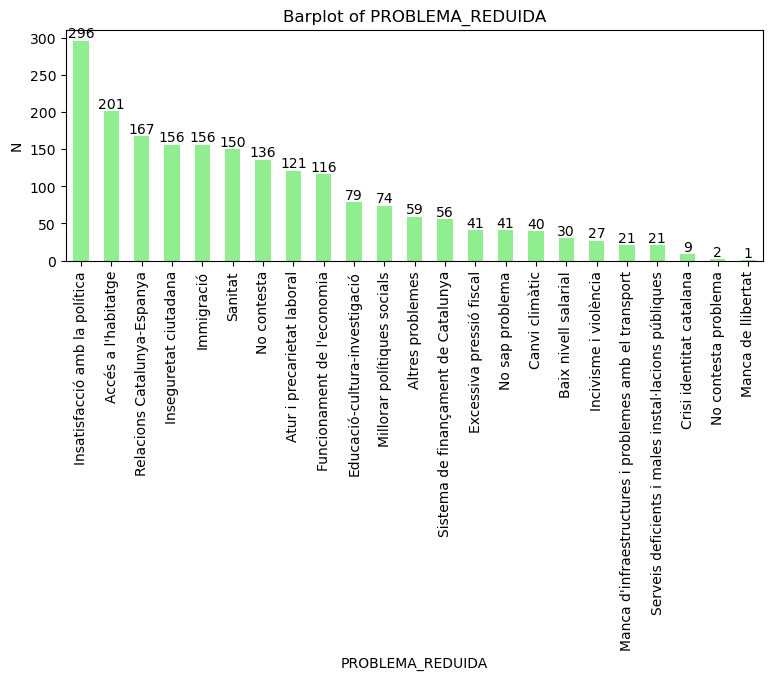

In [8]:
plotCategorica("PROBLEMA_REDUIDA",1)

I can see how citizens rate catalan and spanish governments. The rating of both governments are quite similar.

On average, both governments receive a failing score. The shape of the distribution is symmetrical and indicates that most people give a score of 5 to both the Catalan and Spanish governments, while similarly sized minorities rate them as either very good or very bad.

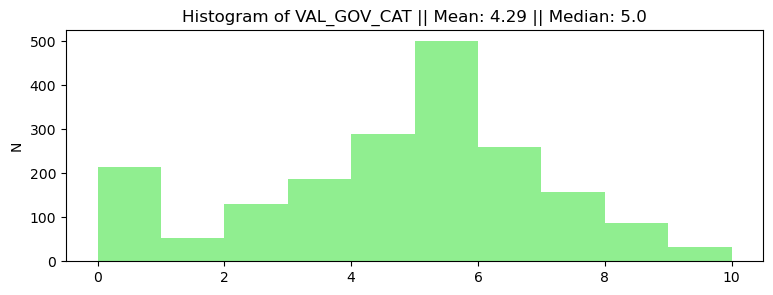

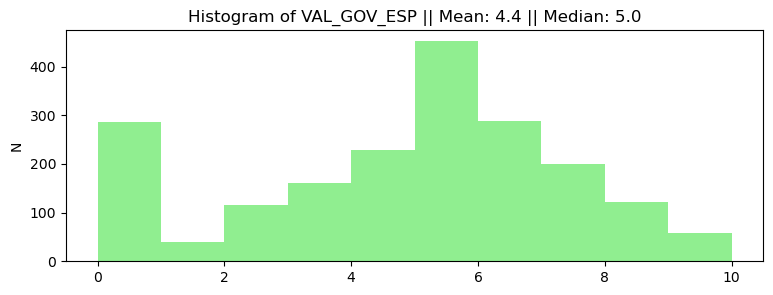

In [9]:
plotNumerica("VAL_GOV_CAT")
plotNumerica("VAL_GOV_ESP")

I want to explore how individuals identify themselves in terms of their Catalan and Spanish identity, as well as their alignment on the political spectrum, specifically whether they lean more towards the left or right wing.

- ```ESP_CAT_0_10```: A score of ```1``` indicates identifying fully as Spanish and not at all as Catalan, while a score of ```10``` represents the opposite—identifying completely as Catalan and not Spanish.

- ```IDEOL_0_10```: A score of ```1``` indicates identifying as extremely left-wing, while a score of ```10``` represents identifying as extremely right-wing.

The majority of individuals consider themselves slightly more Catalan than Spanish, with a significant portion of the sample considering themselves equally Spanish and Catalan, giving a score of 5. There is also a group of people who consider themselves completely Catalan and not at all Spanish.

Regarding the political ideology spectrum, people tend to identify more with the left than the right, with again a portion of individuals who consider themselves both left-wing and right-wing.



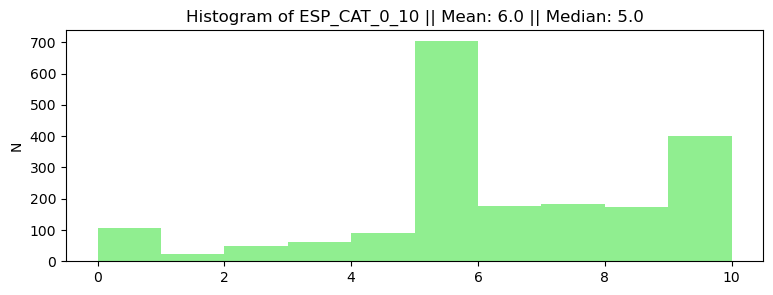

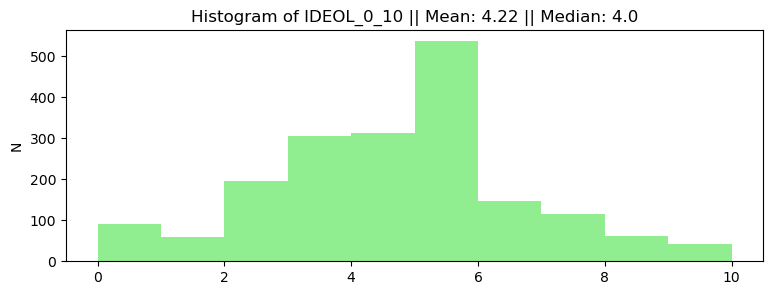

In [10]:
plotNumerica("ESP_CAT_0_10")
plotNumerica("IDEOL_0_10")

_____________________

## 03. Language use

The majority of individuals' mother tongue is Spanish. However, it is observed that the language of identification is equally split between Spanish and Catalan.

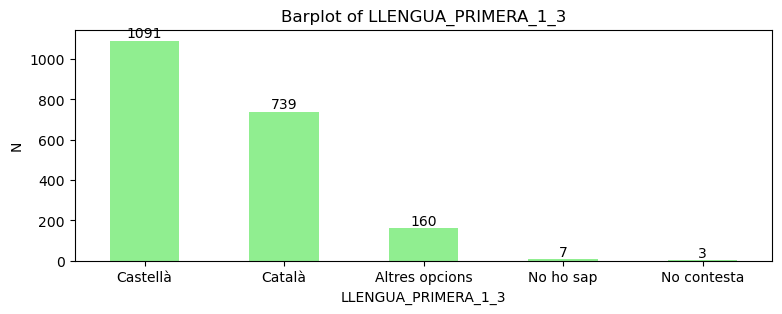

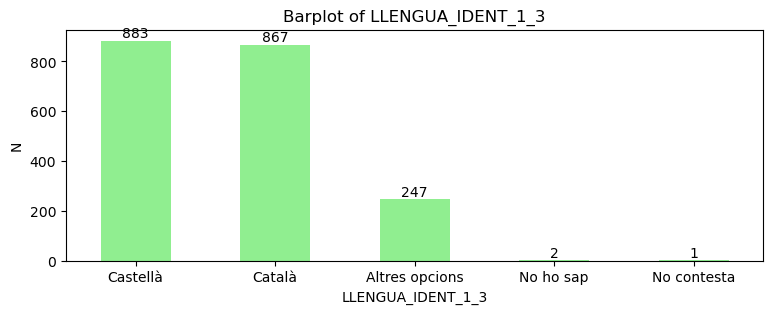

In [11]:
plotCategorica("LLENGUA_PRIMERA_1_3",0)
plotCategorica("LLENGUA_IDENT_1_3",0)